In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Assignment
## 1. Try to model the result of a coin toss. In your model, include any features that you think important in explaining the result. Discuss with your mentor about the pros and cons of adding too many features into your model.

I'm going to start with a binomial distribution, with random data.

This should approximate 10000 coin tosses, with a "fair" coin (.5 chance of either heads or tails).

In [15]:
# I cribbed this code from an old assignment about plotting distributions
binomial_distribution = np.random.binomial(1,.5,size=10000)

Turn the distribution into a dataframe, so we can do more stuff with it. Maybe plot it using Seaborn for fun.

In [12]:
binomial_df = pd.DataFrame(data=binomial_distribution,columns=['outcome'])
binomial_df.head()

,outcome
0,0
1,1
2,0
3,1
4,1


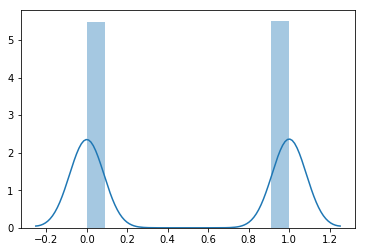

In [11]:
sns.distplot(binomial_df)

...And because I didn't know what to do from here, I took a peek at the sample solution and saw that I just needed to list some things that could affect a coin toss. Now I feel silly because I was trying to figure out how to make use of a dataset that only has one column--there would only be one choice for variables to keep in order to approximate the outcome. Not a very interesting exercise. :)

__But yeah, if we're just thinking about physical factors that would affect a coin toss, it would be things like:__
1. The coin itself--its size and mass;
2. How the coin's mass is distributed: evenly, resulting in a "fair" toss? Or biased in some way that favors one outcome over the other?
2. Who's tossing the coin--their relative strength;
3. How the coin is tossed--the typical flip with a thumb off a curled-up index finger? Just throwing the coin into the air?
4. Air density, wind direction and velocity;
5. The surface on which the coin lands--hard or soft? Does the coin bounce after it lands? Is the surface flat, or uneven?

The more variables that are considered, the more complex the model becomes. It would be easier to nail down some of these variables (have the same person toss the same coin each time, in the same way, in the same physical space, onto the same surface, etc.) and just focus on the outcome of the flip, which is the only important variable here.

## 2. If you ever used Netflix, you should already have realized that it provides some recommendations for you to watch. In data science, this is an example of the so-called recommendations systems. Read this nontechnical blog post of Netflix about how they model their recommendations systems. Then, derive the features they use in their recommendations engines and discuss what else can be incorporated into this model.

Here are some things Netflix lists explicitly as factors that are used to determine recommendations:
* Viewing history--titles that you've watched more recently are given more weight
* Ratings you've given to titles you've watched
* Global comparison to members with a similar viewing/ratings history--some recommendations can be made about titles that are not common between you and these other members
* Shared information between titles (genre, categories, actors, release year are some examples given)
* The time of day you watch
* The device on which you watch
* The length of time you spend watching Netflix

They explicitly do _not_ use demographics like age or gender when determining a list of recommendations.

So I read a suggestion in the sample solution that maybe recommendations based on other local users would be a good idea. It's possible Netflix has updated their post since the sample solution was written, but Netflix discusses the reasons for going global with their recommendation algorithm instead of limiting it to a locality/state/country. 

Depending on how "local" we are talking about, it may also be smart of Netflix to not offer recommendations based on other local customers' preferences, out of customer privacy concerns. In a densely-populated area there are enough people to sufficiently mask who has been watching which titles, but in a rural area, this could be problematic. For instance, if a rural customer sees titles that neighbors have watched, that imply someone is a closeted member of the LGBT community. (I'm probably going out on a limb, but I'm sort of relating this to location-based chat apps and how [they have inadvertently outed LGBT people in locales where they could be in physical danger, or where strict religious-based laws prohibit same-sex activity](https://www.theverge.com/2018/4/25/17279270/lgbtq-dating-apps-egypt-illegal-human-rights).)